# Open notebook in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arsalmairaj2k/taxi_trip_analysis/blob/main/Task2.ipynb)

# Task 2: Exploratory Data Analysis (EDA)

## 1. Data visualization

## Setup
We start by installing the required libraries to handle the required operations on our data.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load Dataset
Just like the previous task, we load our dataset from our GitHub repository.

In [92]:
GITHUB_URL = "https://github.com/arsalmairaj2k/taxi_trip_analysis/raw/main/TaxiTripData.xlsx"
df = pd.read_excel(GITHUB_URL)

# a. Plotting Histogram
Now we plot the histogram of numeric features of our dataset.

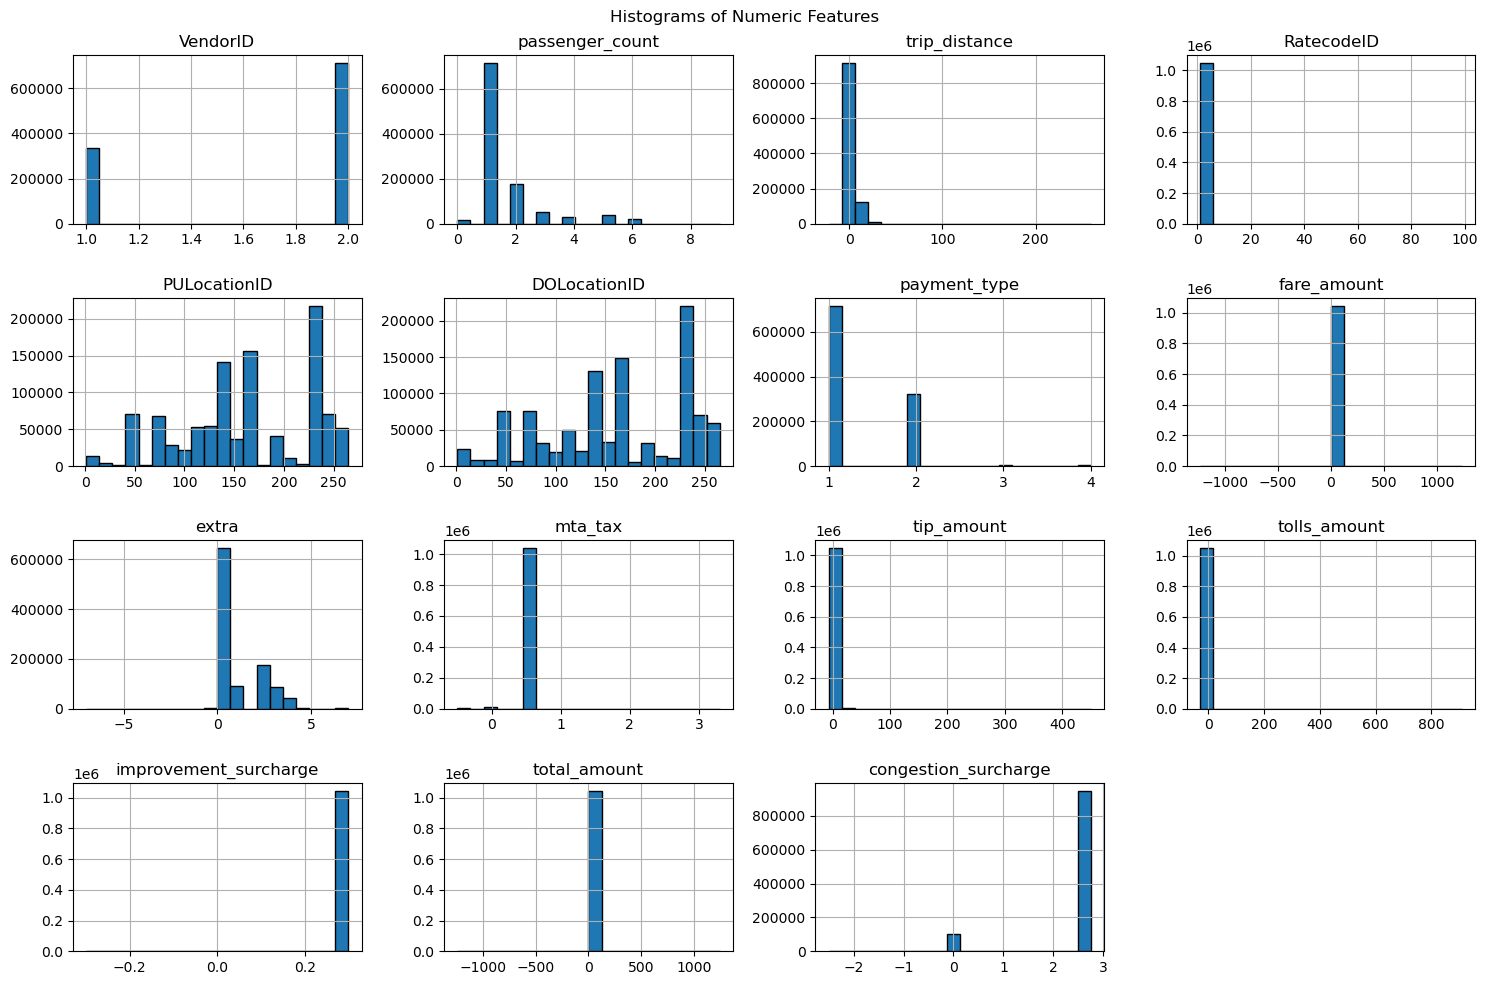

In [106]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot histograms for each numeric feature
df[numeric_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')

# Display the plots
plt.suptitle("Histograms of Numeric Features", fontsize=12)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# b. Scatter plots & correlation matrix

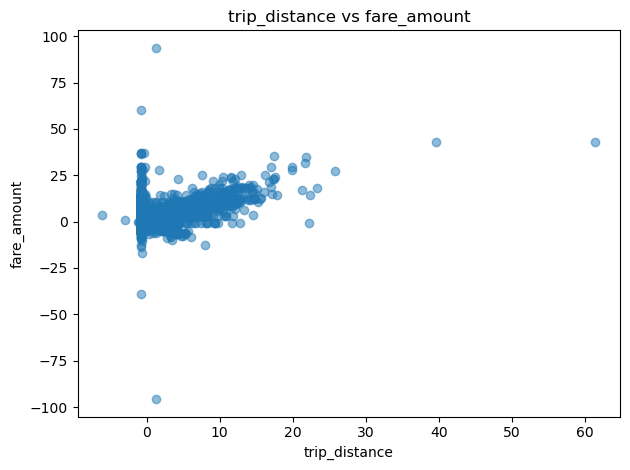

In [113]:
# Selecting only numeric features
numeric_df = df.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Scatter plot for trip_distance vs fare_amount
plt.figure()  # Create a new figure
plt.scatter(scaled_df['trip_distance'], scaled_df['fare_amount'], alpha=0.5)
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title('trip_distance vs fare_amount')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Correlation Matrix

In [111]:
# Correlation Matrix Calculation
correlation_matrix = scaled_df.corr()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID               1.000000         0.152040       0.026104    0.009342   
passenger_count        0.152040         1.000000       0.018870    0.000673   
trip_distance          0.026104         0.018870       1.000000    0.154404   
RatecodeID             0.009342         0.000673       0.154404    1.000000   
PULocationID          -0.008377        -0.005146      -0.103186   -0.010948   
DOLocationID          -0.002785        -0.004216      -0.102979    0.003207   
payment_type          -0.015391         0.018052      -0.023419   -0.001104   
fare_amount            0.018180         0.019203       0.852622    0.255944   
extra                 -0.863063        -0.123829      -0.028971   -0.027531   
mta_tax               -0.025669        -0.001417      -0.056485   -0.189660   
tip_amount             0.023633         0.002866       0.501606    0.146255   
tolls_amount           0.006592 

# c. Boxplots to identify outliers

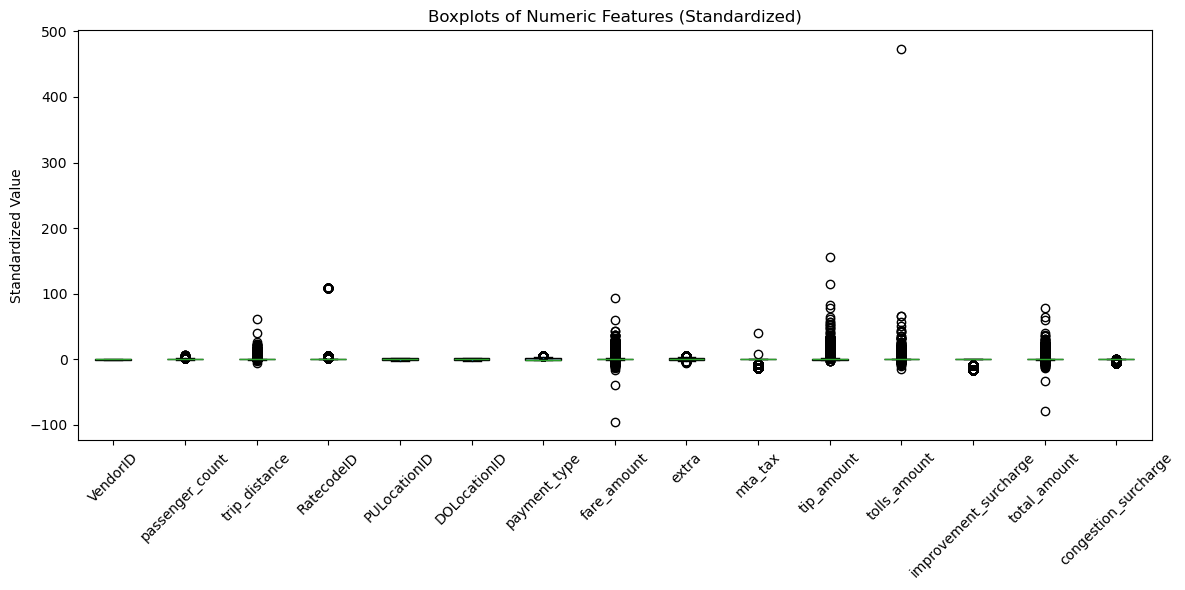

In [115]:
# Boxplots for each numeric feature
plt.figure(figsize=(12, 6))
scaled_df.boxplot(rot=45, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots of Numeric Features (Standardized)")
plt.ylabel("Standardized Value")
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.grid(False)
plt.show()

# 2. Identifying missing values

In [117]:
# Checking for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")

Missing Values per Column:
VendorID              2131
passenger_count       2131
RatecodeID            2131
store_and_fwd_flag    2131
payment_type          2131
dtype: int64

Total Missing Values in Dataset: 10655


# Handling the missing values
As we know most machine learning algorithms require complete datasets to function. Missing values can cause errors or prevent the algorithms from learning effectively. So we will use Imputation offered by the sklearn library to fill the missing values with the mean value.

In [119]:
from sklearn.impute import SimpleImputer

# Selecting only numeric features (excluding timestamps and categorical variables)
numeric_cols = df.select_dtypes(include=['number']).columns

# Using Mean Imputation on numeric columns only
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Handling missing values in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])


# 3. Identifying Outliers using Z-score Method
A Z-score measures how many standard deviations a data point is from the mean. Any value with |Z-Score|>3 is considered an outlier

In [121]:
from scipy.stats import zscore

# Compute Z-scores for numeric features
z_scores = df[numeric_cols].apply(zscore)

# Filter outliers
outliers = (z_scores.abs() > 3).sum()
print("Number of Outliers per Column:")
print(outliers)


Number of Outliers per Column:
VendorID                     0
passenger_count          22842
trip_distance            40801
RatecodeID                8267
PULocationID                 0
DOLocationID                 0
payment_type              9371
fare_amount              13123
extra                     1230
mta_tax                  11553
tip_amount               25461
tolls_amount              4478
improvement_surcharge     4130
total_amount             33990
congestion_surcharge      2734
dtype: int64


# 4. Identify and Discuss Important Features
As my problem is of regression type, important features highly correlated with the target variable are as follow

In [123]:
# Selecting only numeric features
numeric_df = df.select_dtypes(include=['number'])

# Computing correlation with the target variable
target_variable = 'fare_amount'

correlations = numeric_df.corr()[target_variable].sort_values(ascending=False)
print("Feature Importance Based on Correlation:")
print(correlations)

Feature Importance Based on Correlation:
fare_amount              1.000000
total_amount             0.977846
trip_distance            0.852622
tip_amount               0.533535
tolls_amount             0.515076
RatecodeID               0.254220
improvement_surcharge    0.106041
passenger_count          0.019074
VendorID                 0.018058
extra                   -0.038321
payment_type            -0.050161
DOLocationID            -0.083466
PULocationID            -0.089377
mta_tax                 -0.097626
congestion_surcharge    -0.251910
Name: fare_amount, dtype: float64


## The above output shows the correlation between each feature and the target variable (fare_amount). Here's how I would interpret it:

# Highly Important Features (Strong Correlation)

total_amount (0.97) – This is almost perfectly correlated with fare_amount, which makes sense since total_amount includes the fare, taxes, tolls, and surcharges.

trip_distance (0.85) – Strong positive correlation suggests that the fare increases as the distance traveled increases.

tip_amount (0.53) – Moderate positive correlation; longer or higher-fare trips might be associated with higher tips.

tolls_amount (0.51) – Indicates that tolls contribute to the fare, which is expected.

# Moderately Important Features

RatecodeID (0.25) – Indicates different rate structures.

improvement_surcharge (0.10) – Small but positive effect, possibly due to fixed surcharges.

# Negligible Features

passenger_count (0.019) – Almost no correlation; the number of passengers doesn't significantly affect the fare.

VendorID (0.018) – Negligible effect; the taxi company doesn't determine the fare amount significantly.

extra (-0.038) – Slightly negative impact, but not meaningful.

# Features with Negative Correlation

payment_type (-0.05) – Slight negative correlation; possibly indicating differences in fare structures based on payment method.

DOLocationID (-0.083) & PULocationID (-0.09) – Weak negative correlation, suggesting that different pickup/drop-off locations may have slightly lower fares.

mta_tax (-0.097) – Very weak negative correlation, possibly due to how the tax is applied across fare categories.

congestion_surcharge (-0.25) – The negative correlation suggests that rides with this surcharge tend to have slightly lower fares, possibly because short trips within congested areas pay this surcharge more often.